In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import sys
sys.path.append("./RNN_scripts")
import torch
import numpy as np
from RNN_scripts.modules import LowRankRNN
import MARBLE
from MARBLE import utils, geometry, plotting, postprocessing, compare_attractors
from example_utils import generate_trajectories, plot_experiment, aggregate_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---- Embedding dimension: 3
---- Signal dimension: 3



Computing tangent spaces...: 100%|███████████████| 2/2 [00:00<00:00, 166.27it/s]



Fraction of variance explained:  tensor([0.5992, 0.9335, 1.0000])

---- Manifold dimension: 2


Computing connections...: 100%|███████████████████| 2/2 [00:00<00:00, 79.64it/s]


---- Computing kernels ... Done 


---- Embedding dimension: 3
---- Signal dimension: 3



Computing tangent spaces...: 100%|███████████████| 2/2 [00:00<00:00, 333.28it/s]



Fraction of variance explained:  tensor([0.7298, 0.9969, 1.0000])

---- Manifold dimension: 2


Computing connections...: 100%|██████████████████| 2/2 [00:00<00:00, 214.33it/s]


---- Computing kernels ... Done 


[<Axes3DSubplot:>, <Axes3DSubplot:>]

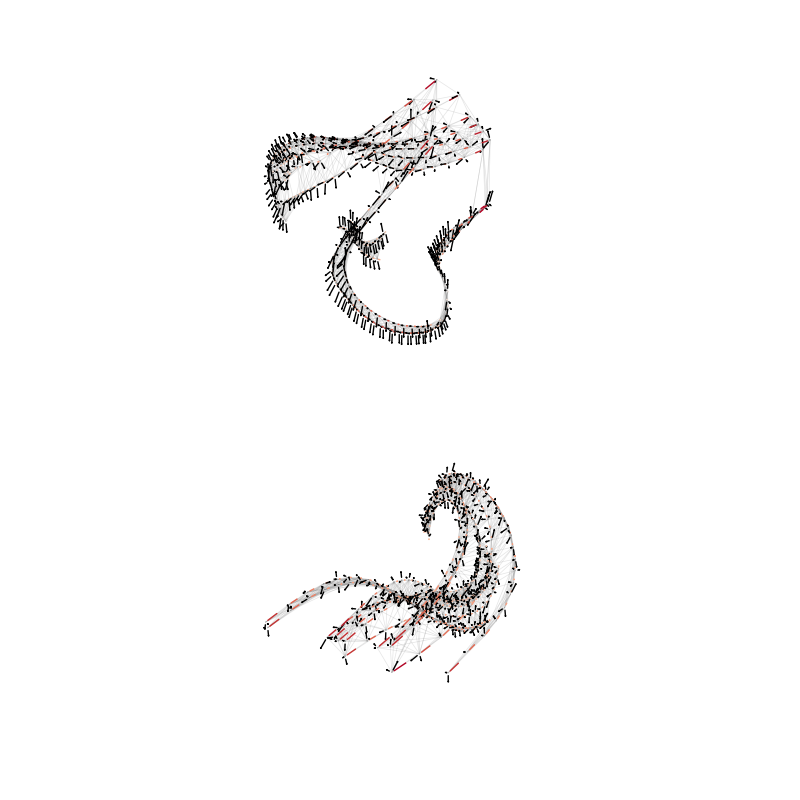

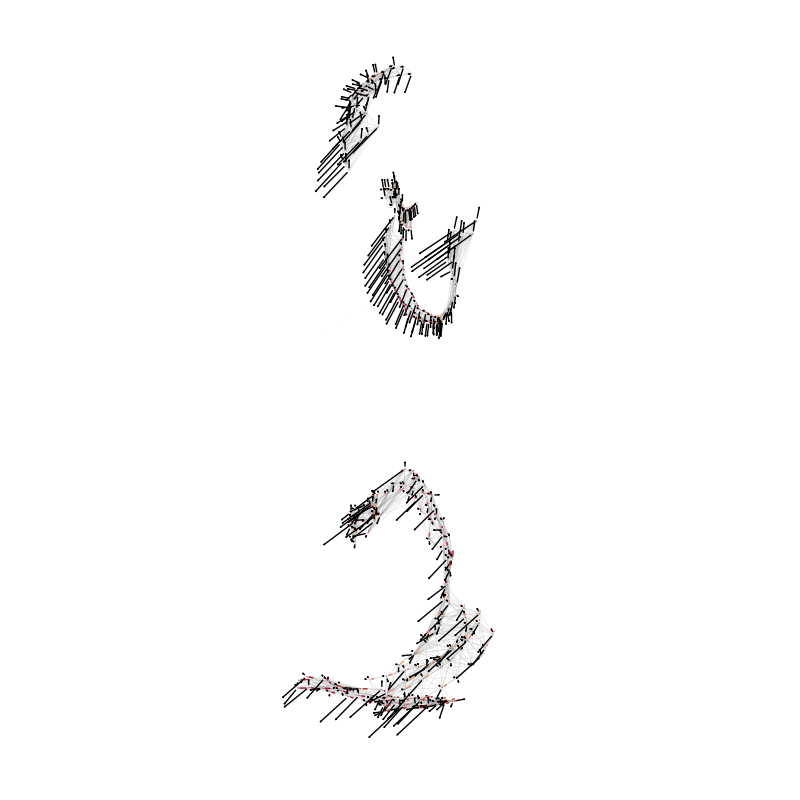

In [14]:
hidden_size = 500
noise_std = 5e-2
alpha = 0.2
net =  LowRankRNN(2, hidden_size, 1, noise_std, alpha, rank=2)
net.load_state_dict(torch.load(f'./RNN_scripts/dms_rank2_{hidden_size}.pt', map_location='cpu'))
net.svd_reparametrization()


stim1_begin, stim1_end, stim2_begin, stim2_end, decision = 25, 50, 200, 225, 275
epochs = [0, stim1_begin, stim1_end, stim2_begin, stim2_end, decision]
gain = 1

input = torch.zeros(1, decision, 2)
input[0, stim1_begin:stim1_end, 0] = 1.
input[0, stim2_begin:stim2_end, 0] = 1.

n_traj=10

traj = generate_trajectories(net, input, epochs, n_traj, fname='./outputs/RNN_test.pkl')
pos, vel = aggregate_data(traj, epochs, transient=0)
data = utils.construct_dataset(pos, features=vel, graph_type='cknn', k=15, stop_crit=0.01, n_geodesic_nb=10)


plotting.fields(data, col=1, alpha=0.2, width=0.01, scale=15, plot_gauges=True)

pos, vel = aggregate_data(traj, epochs, transient=15)
data = utils.construct_dataset(pos, features=vel, graph_type='cknn', k=15, stop_crit=0.01, n_geodesic_nb=10)


plotting.fields(data, col=1, alpha=0.2, width=0.01, scale=15, plot_gauges=True)

# par = {'epochs': 100, #optimisation epochs
#        'order': 2, #order of derivatives
#        'hidden_channels': 32, #number of internal dimensions in MLP
#        'out_channels': 3,
#        'inner_product_features': True,
#       }

# model = MARBLE.net(data, **par)
# model.run_training(data)